In [ ]:
!pip install statsmodels --upgrade
!pip install pmdarima --upgrade

     |████████████████████████████████| 9.5 MB 6.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.5 MB 8.4 MB/s 


In [ ]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pmdarima import auto_arima 
import warnings 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
# dataframes creation for both training and testing datasets 
from google.colab import files
uploaded = files.upload()
import io
history_df = pd.read_csv(io.BytesIO(uploaded['History_OpenHighLowClose.csv']))

Saving History_OpenHighLowClose.csv to History_OpenHighLowClose (6).csv


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
history_df_test = pd.read_csv(io.BytesIO(uploaded['History_OpenHighLowCloseTest.csv']))

Saving History_OpenHighLowCloseTest.csv to History_OpenHighLowCloseTest (6).csv


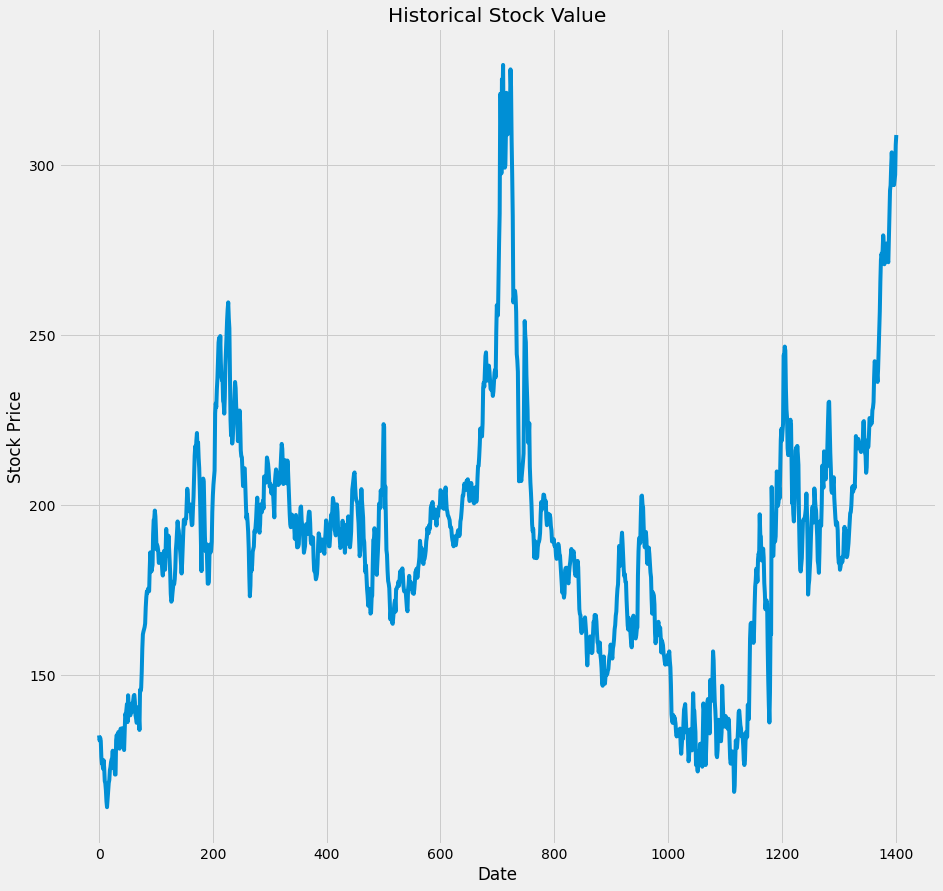

In [ ]:
plt.figure(figsize=(14,14))
plt.plot(history_df['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web

df = history_df
df.reset_index(inplace=True)
df.describe()

,index,Open,High,Low,Close
count,1402.000000,1402.000000,1402.000000,1402.000000,1402.00000
mean,700.500000,188.572397,193.032168,184.492368,188.83117
std,404.866851,36.499191,38.033320,35.711535,36.94179
min,0.000000,113.300000,115.400000,109.000000,111.20000
25%,350.250000,168.050000,171.625000,164.700000,168.02500
50%,700.500000,189.500000,193.200000,185.950000,189.45000
75%,1050.750000,204.275000,208.400000,200.600000,204.87500
max,1401.000000,323.400000,358.700000,317.300000,329.40000


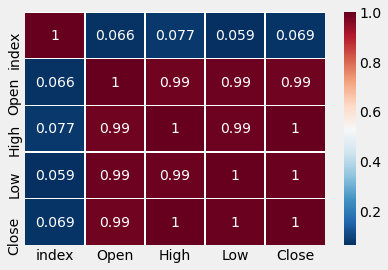

In [ ]:
corr = df.corr(method='pearson')
corr
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

In [ ]:
#prepare dataset to work with 
nflx_df=df[['Date','Open','High','Low','Close']]
nflx_df.tail(10)

,Date,Open,High,Low,Close
1392,2021-07-23,290.2,302.9,290.2,299.6
1393,2021-07-26,294.9,311.6,294.9,303.7
1394,2021-07-27,299.3,306.3,295.5,300.3
1395,2021-07-28,299.8,299.8,286.0,294.1
1396,2021-07-29,296.9,304.4,292.1,298.6
1397,2021-07-30,297.8,299.9,287.4,294.1
1398,2021-08-02,295.9,300.9,292.9,295.6
1399,2021-08-03,295.7,301.1,291.2,297.1
1400,2021-08-04,296.4,312.3,296.4,305.9
1401,2021-08-05,301.2,312.2,301.2,308.8


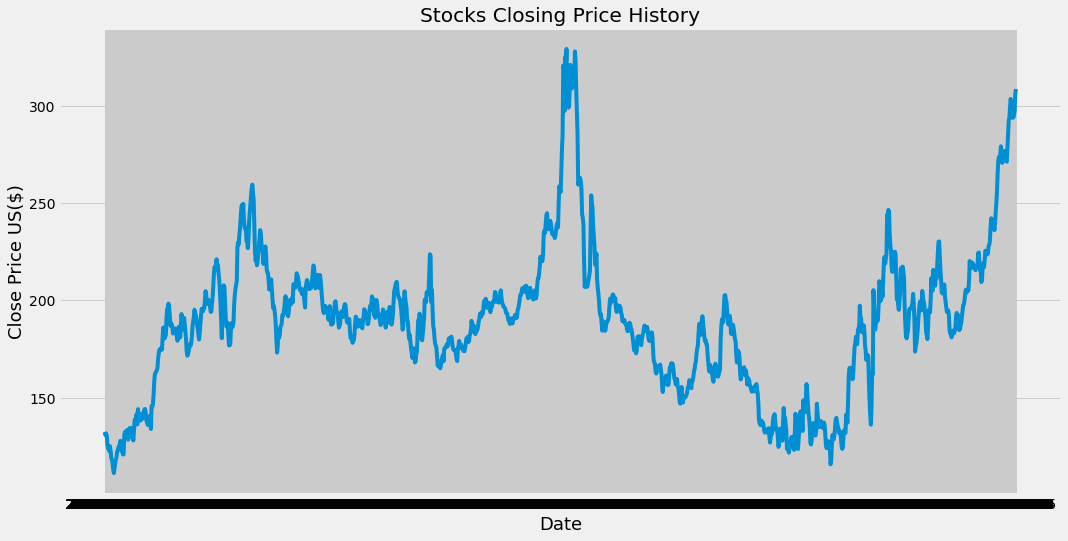

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Stocks Closing Price History')
plt.plot(nflx_df['Date'],nflx_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US(INR)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

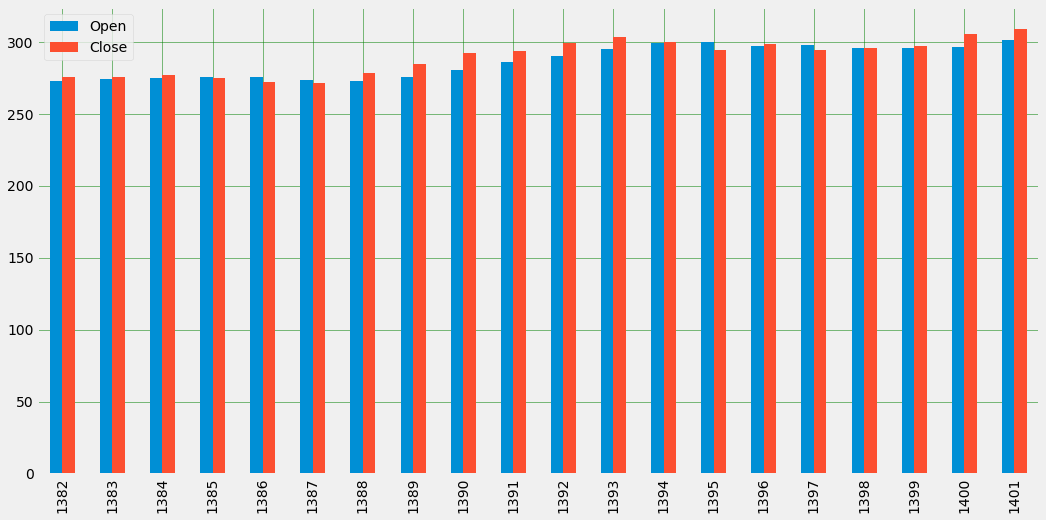

In [ ]:
#Plot Open vs Close
nflx_df[['Open','Close']].tail(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
nflx_df['Year']=pd.to_datetime(df['Date']).dt.year
nflx_df['Month']=pd.to_datetime(df['Date']).dt.month
nflx_df['Day']=pd.to_datetime(df['Date']).dt.day
nfx_df=nflx_df[['Day','Month','Year','High','Open','Low','Close']]
nfx_df.tail(10)

,Day,Month,Year,High,Open,Low,Close
1392,23,7,2021,302.9,290.2,290.2,299.6
1393,26,7,2021,311.6,294.9,294.9,303.7
1394,27,7,2021,306.3,299.3,295.5,300.3
1395,28,7,2021,299.8,299.8,286.0,294.1
1396,29,7,2021,304.4,296.9,292.1,298.6
1397,30,7,2021,299.9,297.8,287.4,294.1
1398,2,8,2021,300.9,295.9,292.9,295.6
1399,3,8,2021,301.1,295.7,291.2,297.1
1400,4,8,2021,312.3,296.4,296.4,305.9
1401,5,8,2021,312.2,301.2,301.2,308.8


In [ ]:
#separate Independent and dependent variable
X = nfx_df.iloc[:,nfx_df.columns !='Close']
Y= nfx_df.iloc[:, 5]
print(X.shape) #output: (2093, 6)
print(Y.shape) #output: (2093,)

(1402, 6)
(1402,)


In [ ]:
###########################################################################LINEAR REGRESSION#######################################################################
#Linear Regression Model Training and Testing
###########################################################################LINEAR REGRESSION#######################################################################

lr_model=LinearRegression()
lr_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#prepare dataset to work with 
nflx_df_t=history_df_test[['Date','Open','High','Low','Close']]
nflx_df_t['Year']=pd.to_datetime(history_df_test['Date']).dt.year
nflx_df_t['Month']=pd.to_datetime(history_df_test['Date']).dt.month
nflx_df_t['Day']=pd.to_datetime(history_df_test['Date']).dt.day
nfx_df_t=nflx_df_t[['Day','Month','Year','High','Open','Low','Close']]
nfx_df_t.tail(1)

,Day,Month,Year,High,Open,Low,Close
0,6,8,2021,311.3,305.0,304.4,308.1


(1, 6)
(1,)


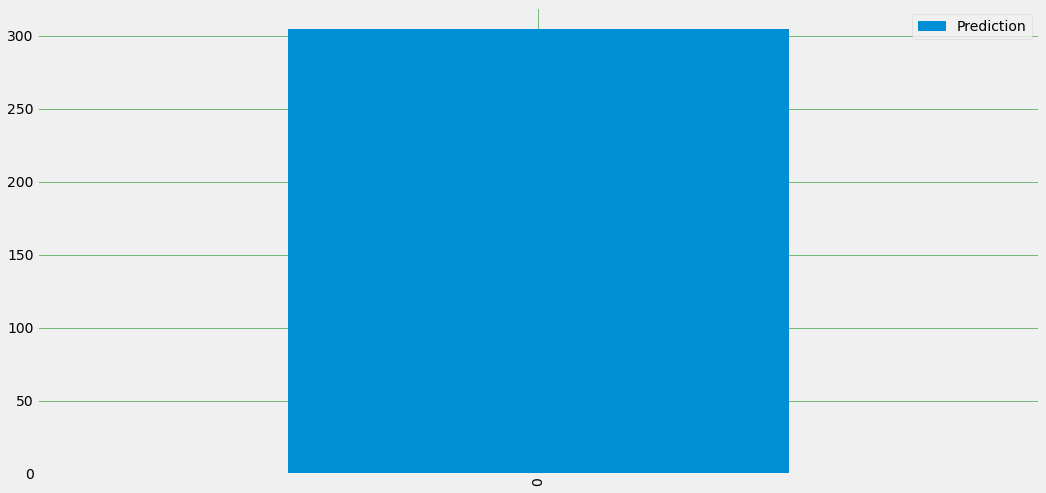

   Prediction
0       304.4
[304.4]


In [ ]:
#separate Independent and dependent variable
X_t = nfx_df_t.iloc[:,nfx_df_t.columns !='Close']
Y_t= nfx_df_t.iloc[:, 5]
print(X_t.shape) #output: (2093, 6)
print(Y_t.shape) #output: (2093,)
y_pred=lr_model.predict(X_t)
plot_df=pd.DataFrame({'Prediction':y_pred})
plot_df.tail(10).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print(plot_df.tail(10))
print(y_pred)

In [ ]:
###########################################################################KNN#######################################################################
#                                                                          KNN
###########################################################################KNN#######################################################################

from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(X,Y)
y_knn_pred=knn_model.predict(X_t)

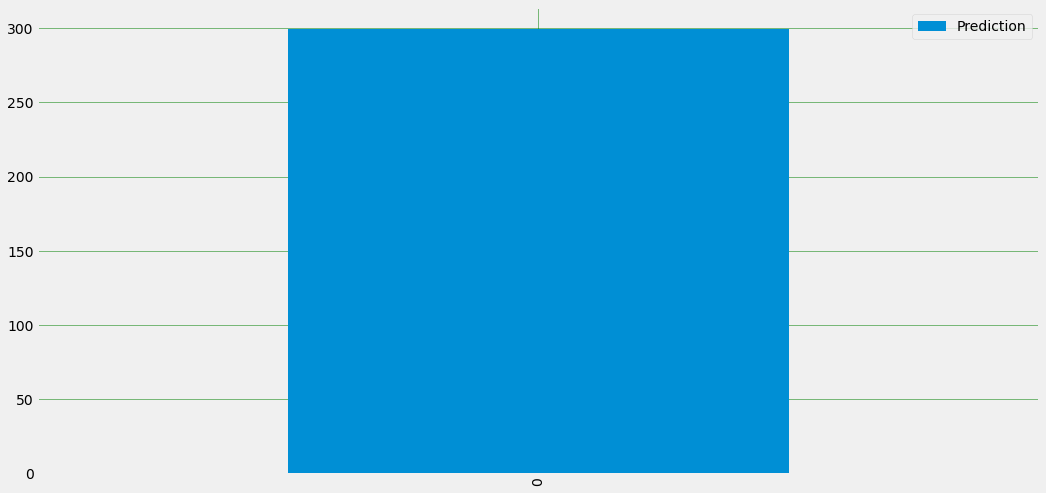

   Prediction
0      299.35
[299.35]


In [ ]:
plot_knn_df=pd.DataFrame({'Prediction':y_knn_pred})
plot_knn_df.tail(10).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print(plot_knn_df.tail(10))
print(y_knn_pred)

In [ ]:
###########################################################################SVM#######################################################################
#                                                                          SVM
###########################################################################SVM#######################################################################

from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(X,Y)
y_svm_pred=svm_model.predict(X_t)

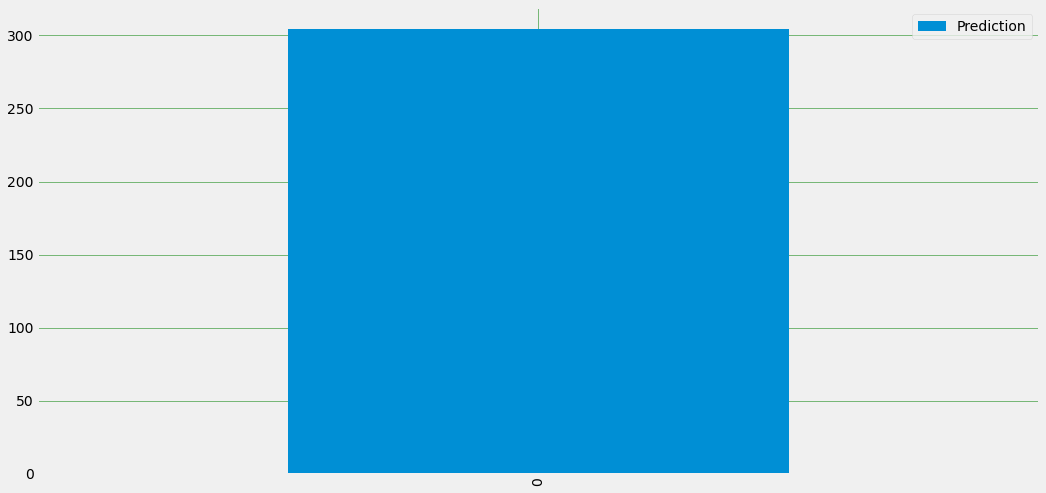

   Prediction
0  304.297948
[304.29794771]


In [ ]:
plot_svm_df=pd.DataFrame({'Prediction':y_svm_pred})
plot_svm_df.tail(10).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
print(plot_svm_df.tail(10))
print(y_svm_pred)

In [ ]:
###########################################################################LSTM#######################################################################
#                                                                          LSTM
###########################################################################LSTM#######################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [ ]:
df = history_df
df.shape
df = df['Open'].values
df = df.reshape(-1, 1)

df_t = history_df_test
df_t.shape
df_t = df_t['Open'].values
df_t = df_t.reshape(-1, 1)

In [ ]:
dataset_train = np.array(df[::])
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)


dataset_test = np.array(df_t[::])
scaler = MinMaxScaler(feature_range=(0,1))
dataset_test = scaler.fit_transform(dataset_test)

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
18/18 [==============================] - 6s 17ms/step - loss: 0.1461
Epoch 2/50
18/18 [==============================] - 0s 14ms/step - loss: 0.0281
Epoch 3/50
18/18 [==============================] - 0s 15ms/step - loss: 0.0092
Epoch 4/50
18/18 [==============================] - 0s 15ms/step - loss: 0.0070
Epoch 5/50
18/18 [==============================] - 0s 15ms/step - loss: 0.0056
Epoch 6/50
18/18 [==============================] - 0s 15ms/step - loss: 0.0058
Epoch 7/50
18/18 [==============================] - 0s 15ms/step - loss: 0.0051
Epoch 8/50
18/18 [==============================] - 0s 16ms/step - loss: 0.0046
Epoch 9/50
18/18 [==============================] - 0s 15ms/step - loss: 0.0041
Epoch 10/50
18/18 [==============================] - 0s 15ms/step - loss: 0.0049
Epoch 11/50
18/18 [==============================] - 0s 15ms/step - loss: 0.0043
Epoch 12/50
18/18 [==============================] - 0s 14ms/step - loss: 0.0046
Epoch 13/50
18/18 [==================

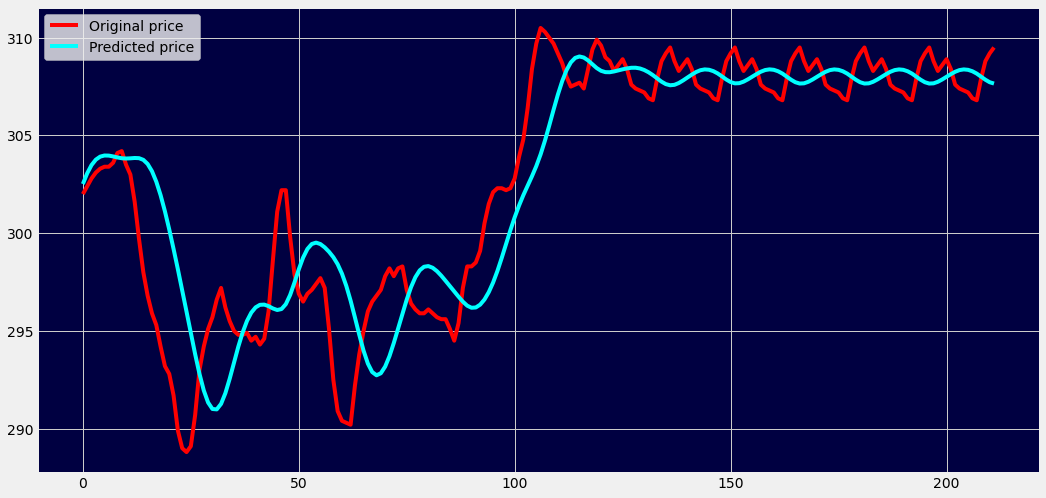

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
history_prophet_df = pd.read_csv(io.BytesIO(uploaded['History_Close.csv']))

Saving History_Close.csv to History_Close.csv


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



787    310.893265
788    311.460784
789    310.911018
790    309.860960
791    309.627775
          ...    
983    323.448066
984    321.599006
985    320.497862
986    320.537476
987    320.838335
Length: 201, dtype: float64


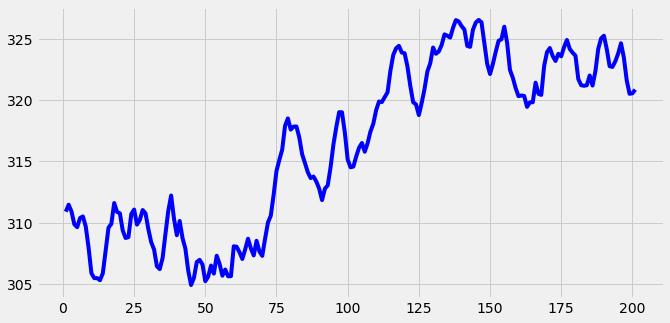

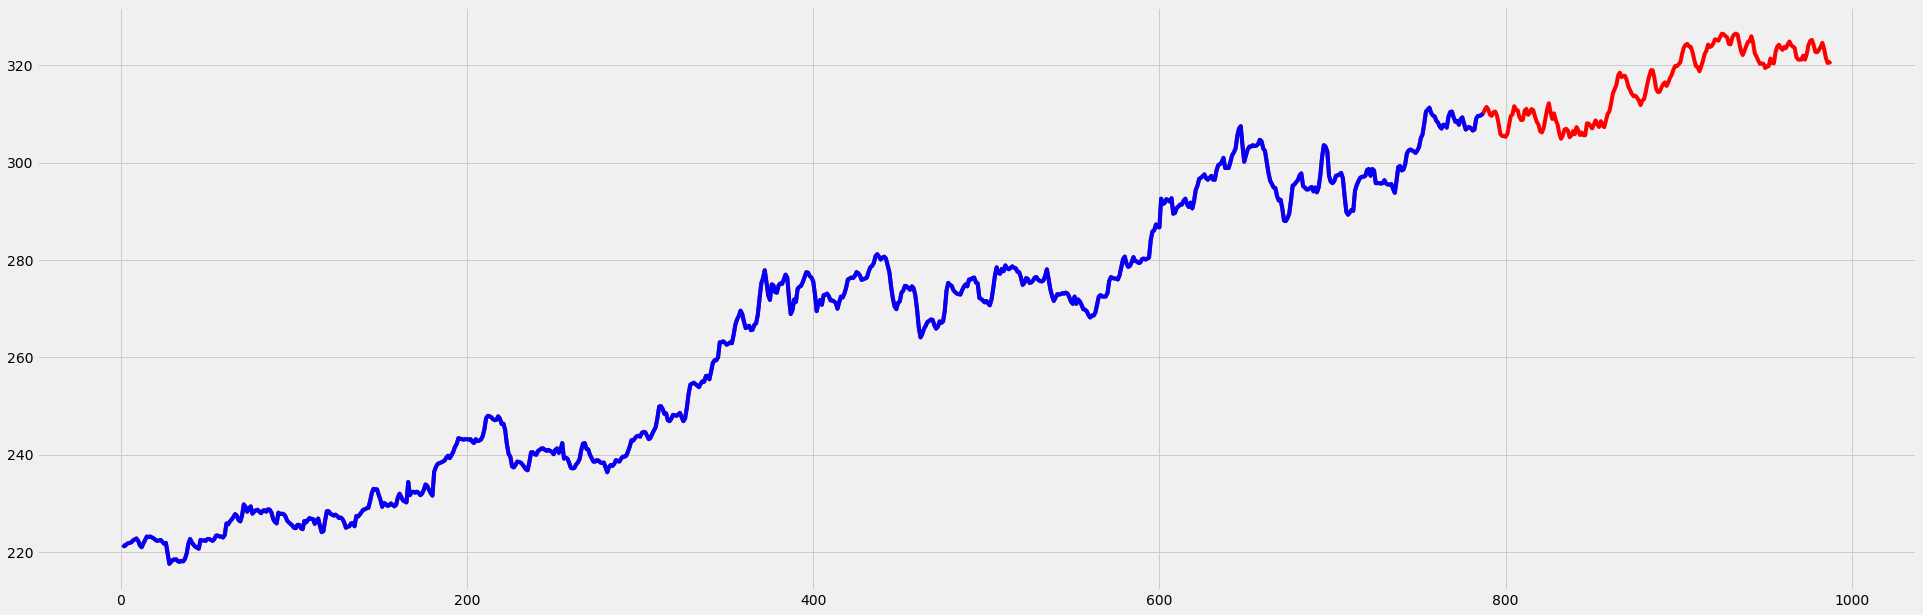

In [ ]:
# *********************************************************************************************AUTOREGRESSION***********************************************************************************************
# The autoregressive model determines that the output variable is linearly dependent on its own previous values and on the stochastic term (responsible for a parameter that cannot be fully predicted). 
# The model takes the form of a stochastic difference equation (or a recurrence relation, but not in the form of a differential equation).
# *********************************************************************************************AUTOREGRESSION***********************************************************************************************
#!pip install statsmodels --upgrade
from statsmodels.tsa.ar_model import AutoReg
import numpy
# fit model
history_prophet_df = history_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})
model = AutoReg(history_prophet_df['y'], lags=(250))
model_fit = model.fit()
# let's make prediction
y = model_fit.predict(len(history_prophet_df['y']), len(history_prophet_df['y'])+200)
print(y)
 
plt.figure(figsize=(10,5))
plt.plot(range(1,len(y)+1), y, 'b')
plt.show()

plt.figure(figsize=(30,10))
prognose = numpy.concatenate((history_prophet_df['y'],y))
plt.plot(range(1,len(prognose)+1), prognose, 'r')
plt.plot(range(1,len(history_prophet_df['y'])+1), history_prophet_df['y'], 'b')
plt.show()

In [ ]:
#####################ARIMA###############################
# Ignore harmless warnings : https://analyticsindiamag.com/comparing-arima-model-and-lstm-rnn-model-in-time-series-forecasting/
#####################ARIMA###############################

warnings.filterwarnings("ignore") 

# Fit auto_arima function to Stock Market Data
stepwise_fit = auto_arima(data2['Close'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)         

  
# To print the summary 
stepwise_fit.summary() 

# Split data into train / test sets 
train = data2.iloc[:len(data2)-1500] 
test = data2.iloc[len(data2)-499:]

# Fit a SARIMAX
model = SARIMAX(data2['Close'],  order = (0, 1, 1),  seasonal_order =(2, 1, 1, 12)) 


result = model.fit() 
result.summary() 


start = len(train) 
end = len(train) + len(test) - 1

  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, typ = 'levels').rename("Predictions") 

  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Close'].plot(legend = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=12.30 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9178.648, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3818.196, Time=4.88 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.85 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9181.983, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4290.845, Time=0.58 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3598.014, Time=13.41 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=36.06 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=13.90 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=9150.237, Time=4.14 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3281.431, Time=15.54 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=3504.094, Time=5.88 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=47.51 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=16.18 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC